Import base librairies (more later)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import sys

# First contact with the data
Load and inspect the data

In [2]:
df = pd.read_csv('../data/happiness_long.csv')

In [3]:
df

country                           region  year  happiness      gdp  \
0    Afghanistan                    Southern Asia  2015      3.575  0.31982   
1        Albania       Central and Eastern Europe  2015      4.959  0.87867   
2        Algeria  Middle East and Northern Africa  2015      5.605  0.93929   
3      Argentina      Latin America and Caribbean  2015      6.574  1.05351   
4        Armenia       Central and Eastern Europe  2015      4.350  0.76821   
..           ...                              ...   ...        ...      ...   
715    Venezuela      Latin America and Caribbean  2019      4.707  0.96000   
716      Vietnam                Southeastern Asia  2019      5.175  0.74100   
717        Yemen  Middle East and Northern Africa  2019      3.380  0.28700   
718       Zambia               Sub-Saharan Africa  2019      4.107  0.57800   
719     Zimbabwe               Sub-Saharan Africa  2019      3.663  0.36600   

      health  generosity   social  corruption  
0    0.30335     0.36510  0.30285     0.09719  
1    0.81325     0.14272  0.80434     0.06413  
2    0.61766     0.07822  1.07772     0.17383  
3    0.78723     0.11451  1.24823     0.08484  
4    0.72990     0.07855  0.77711     0.03900  
..       ...         ...      ...         ...  
715  0.80500     0.06400  0.15400     0.04700  
716  0.85100     0.14700  0.54300     0.07300  
717  0.46300     0.10800  0.14300     0.07700  
718  0.42600     0.24700  0.43100     0.08700  
719  0.43300     0.15100  0.36100     0.08900  

[720 rows x 9 columns]

In [4]:
df.describe()

year   happiness         gdp      health  generosity  \
count   720.000000  720.000000  720.000000  720.000000  720.000000   
mean   2017.000000    5.433007    0.939021    0.634448    0.218768   
std       1.415197    1.117052    0.393786    0.236113    0.124482   
min    2015.000000    2.839000    0.000000    0.000000    0.000000   
25%    2016.000000    4.547250    0.653763    0.498102    0.128474   
50%    2017.000000    5.427000    1.004000    0.667857    0.201725   
75%    2018.000000    6.242500    1.250385    0.814630    0.282035   
max    2019.000000    7.769000    1.870766    1.141000    0.838075   

           social  corruption  
count  720.000000  720.000000  
mean     0.929049    0.123459  
std      0.399115    0.106336  
min      0.000000    0.000000  
25%      0.571654    0.052862  
50%      0.987405    0.088507  
75%      1.255679    0.153645  
max      1.644000    0.551910

All the zeros are actually missing data. Replace them by NaNs.

In [5]:
df_na = df.copy()
for col in ('gdp', 'health', 'generosity', 'social', 'corruption'):
    df_na.loc[df[col]==0, col] = np.nan

A few basic plots

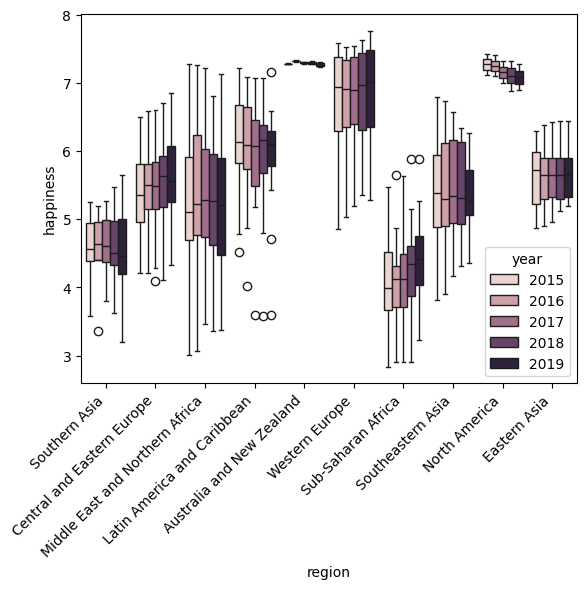

In [6]:
ax = sns.boxplot(df_na, x='region', y='happiness', hue='year')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right');

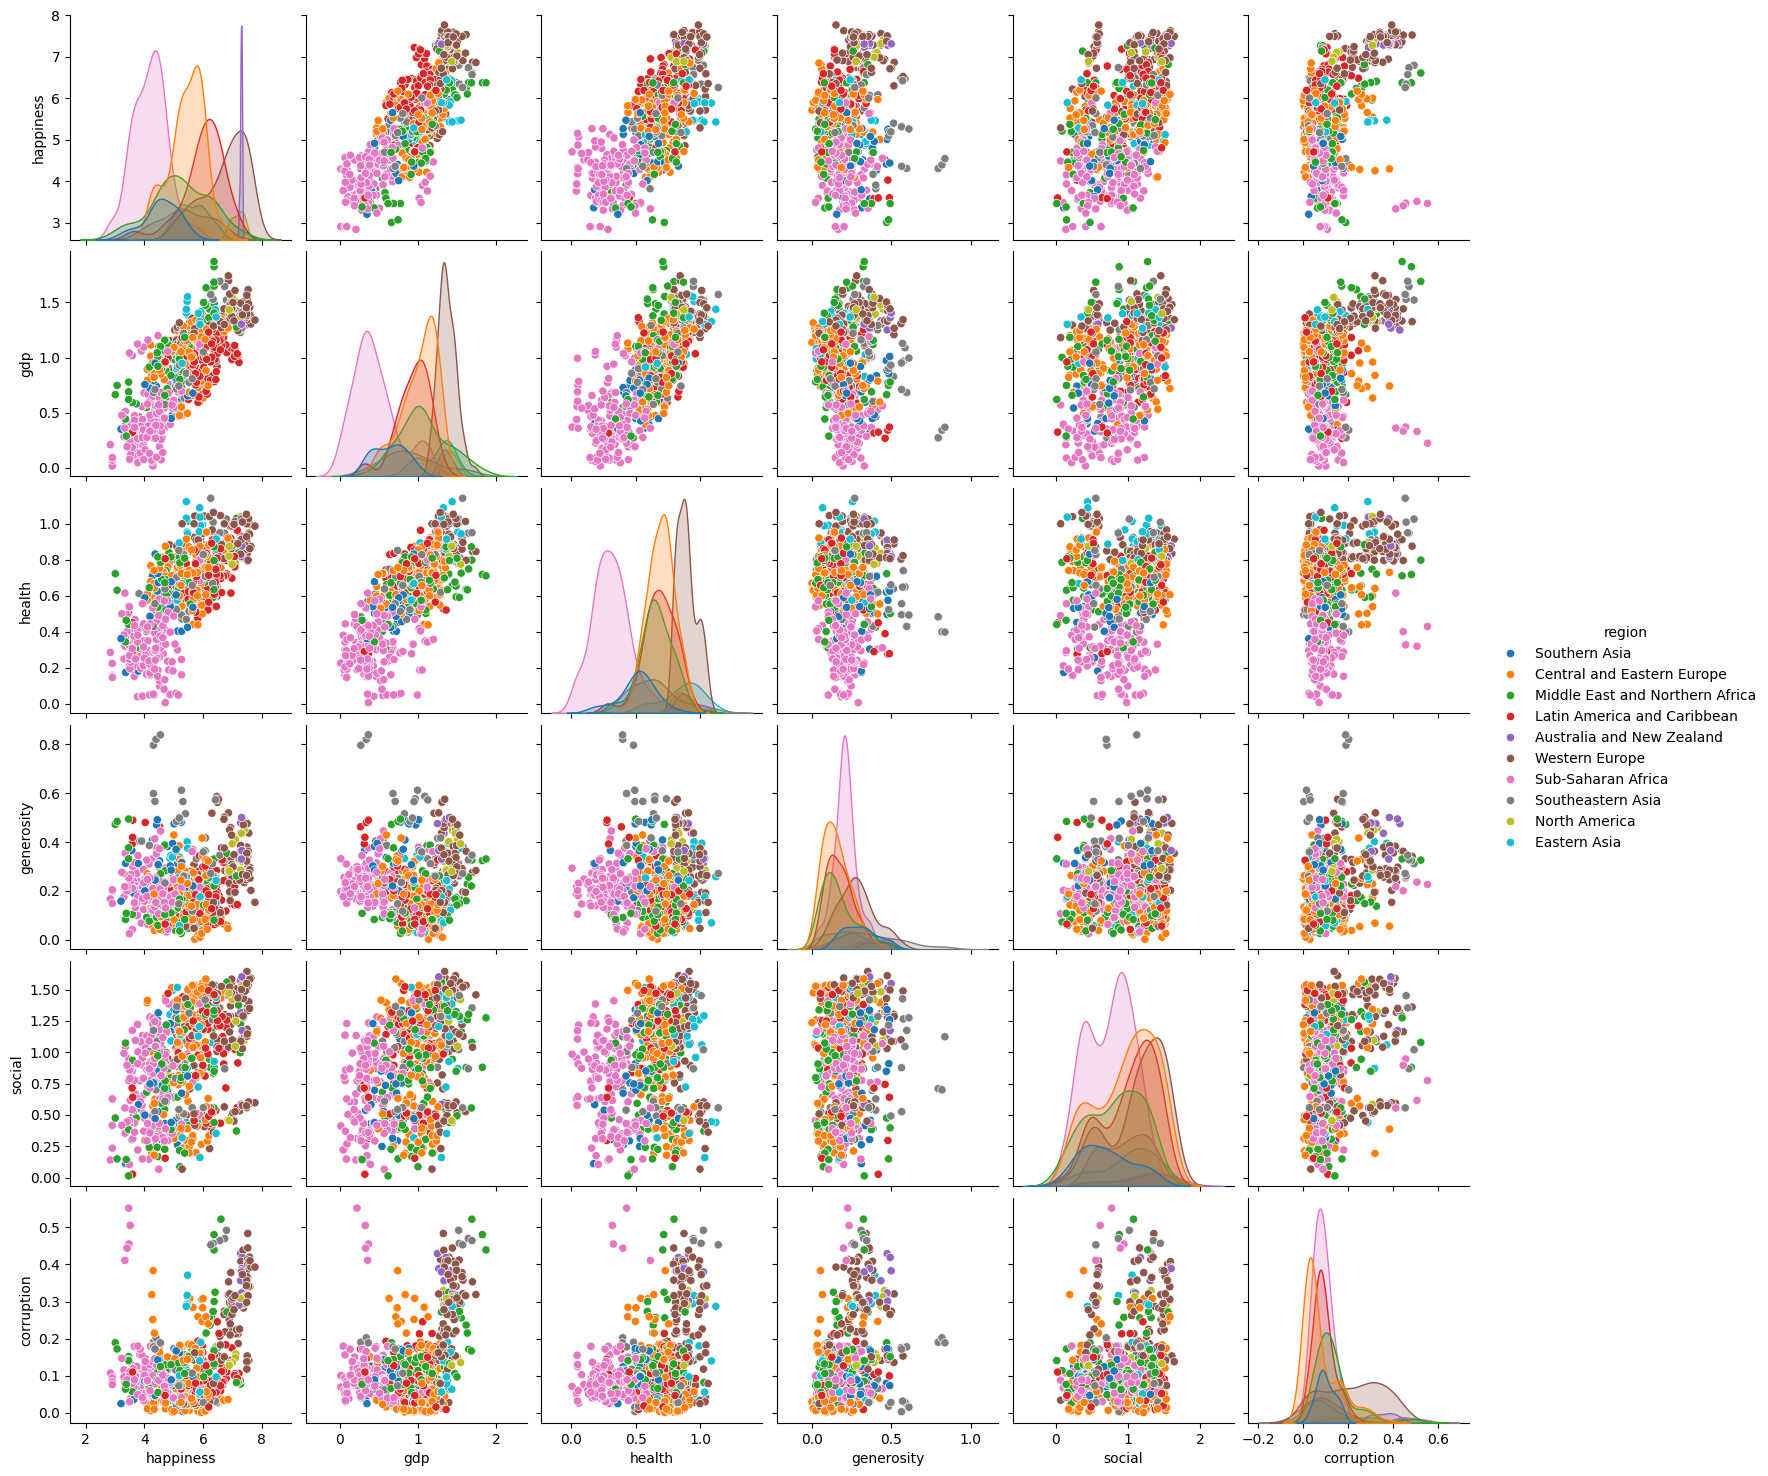

In [7]:
sns.pairplot(df_na, vars=['happiness', 'gdp', 'health', 'generosity', 'social', 'corruption'], hue='region');

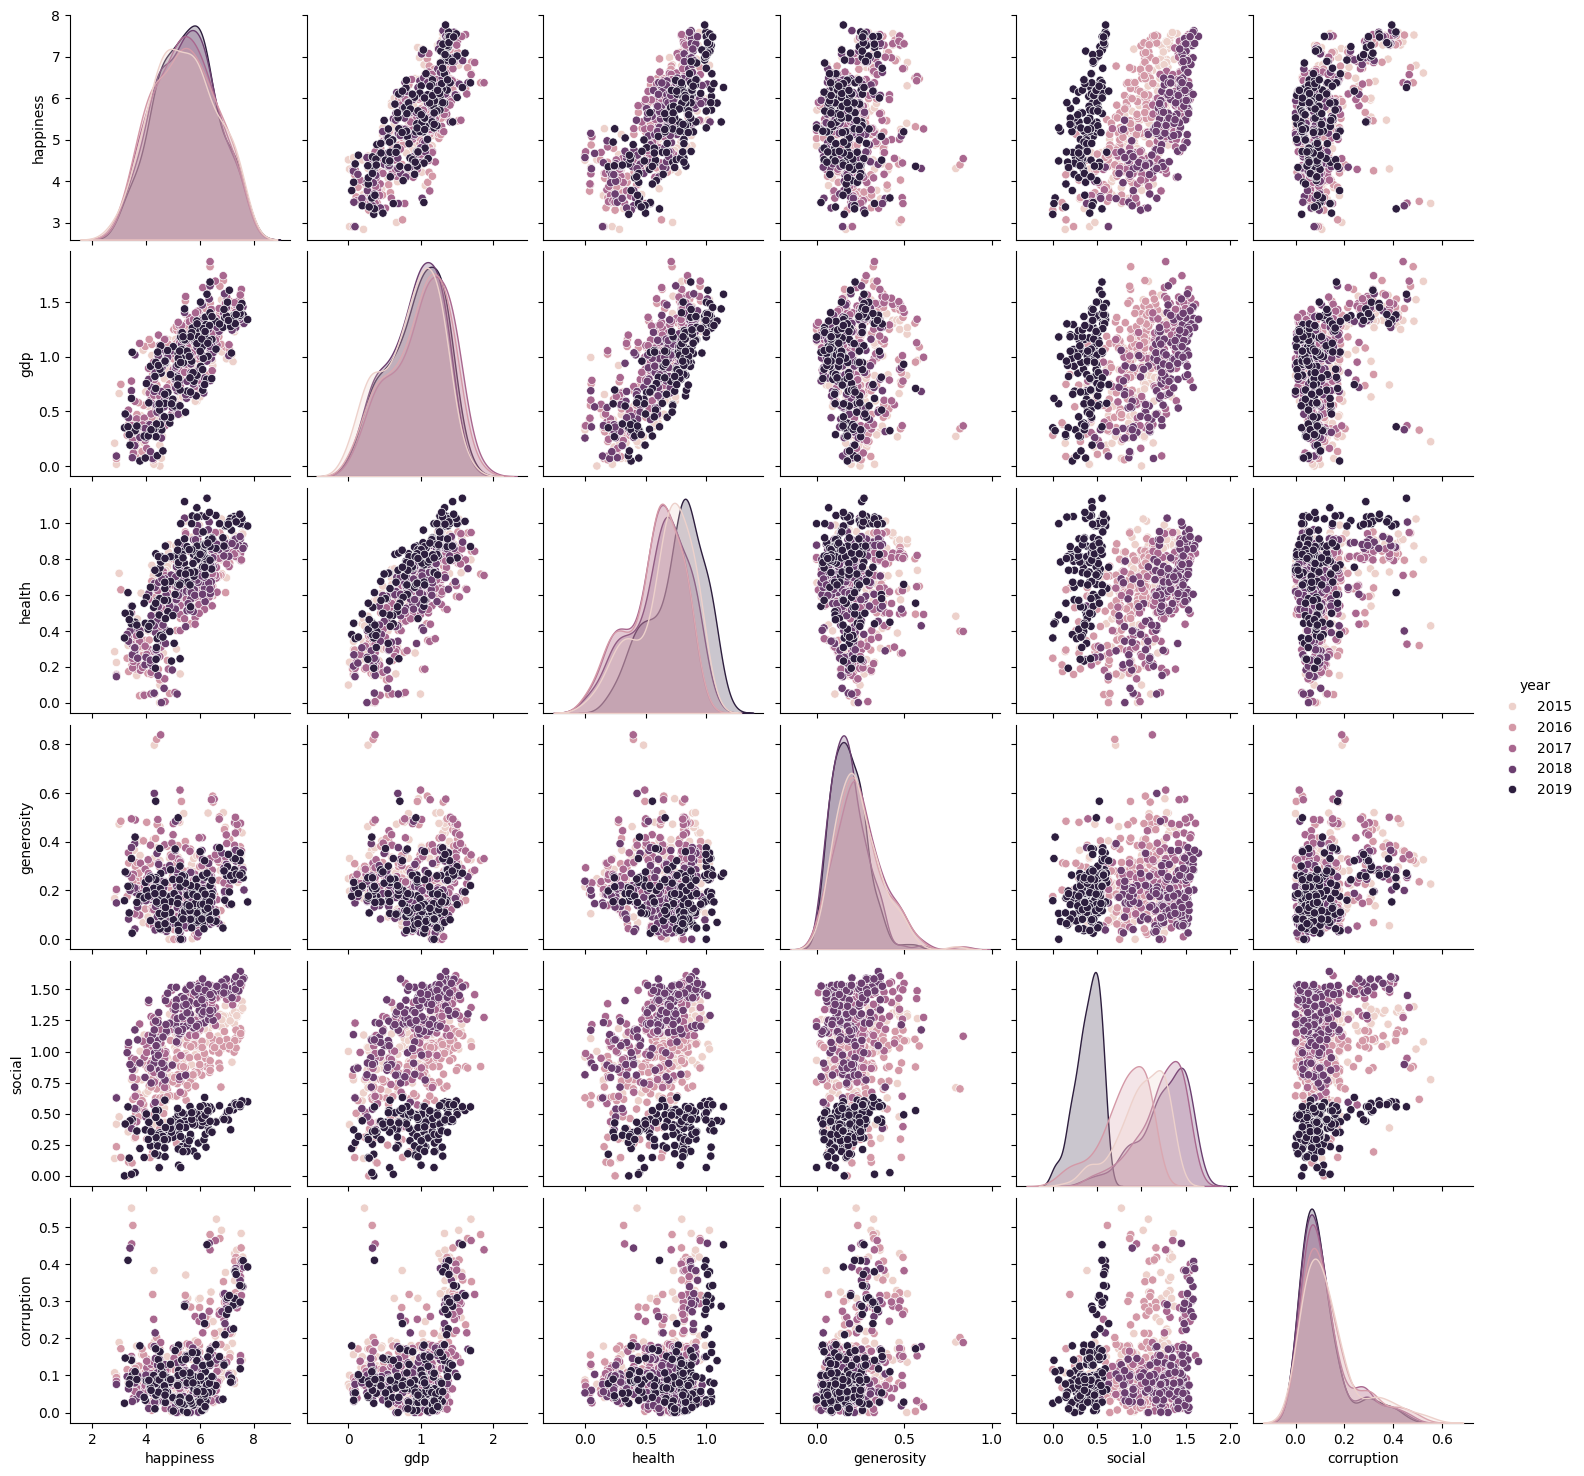

In [8]:
sns.pairplot(df, vars=['happiness', 'gdp', 'health', 'generosity', 'social', 'corruption'], hue='year');

# Linear models
First linear model without interactions, on the whole dataset.

In [51]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

first_model = smf.ols('happiness ~ C(year) + gdp + health + generosity + social + corruption + region', df_na).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sun, 02 Nov 2025   Prob (F-statistic):          1.58e-235
Time:                        19:10:36   Log-Likelihood:                -486.72
No. Observations:                 703   AIC:                             1011.
Df Residuals:                     684   BIC:                             1098.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     3.1364      0.261     11.997      0.000       2.623       3.650
C(year)[T.2016]                               0.1595      0.068      2.359      0.019       0.027       0.292
C(year)[T.2017]                              -0.3053      0.067     -4.591      0.000      -0.436      -0.175
C(year)[T.2018]                              -0.2008      0.065     -3.080      0.002      -0.329      -0.073
C(year)[T.2019]                               0.6549      0.089      7.345      0.000       0.480       0.830
region[T.Central and Eastern Europe]         -0.6743      0.180     -3.750      0.000      -1.027      -0.321
region[T.Eastern Asia]                       -0.9133      0.190     -4.810      0.000      -1.286      -0.540
region[T.Latin America and Caribbean]        -0.0617      0.180     -0.344      0.731      -0.415       0.291
region[T.Middle East and Northern Africa]    -0.7765      0.181     -4.280      0.000      -1.133      -0.420
region[T.North America]                       0.0484      0.222      0.218      0.827      -0.387       0.484
region[T.Southeastern Asia]                  -0.7162      0.184     -3.891      0.000      -1.078      -0.355
region[T.Southern Asia]                      -0.6991      0.197     -3.543      0.000      -1.087      -0.312
region[T.Sub-Saharan Africa]                 -0.7764      0.200     -3.876      0.000      -1.170      -0.383
region[T.Western Europe]                     -0.2325      0.166     -1.397      0.163      -0.559       0.094
gdp                                           1.1426      0.101     11.299      0.000       0.944       1.341
health                                        0.7447      0.206      3.614      0.000       0.340       1.149
generosity                                    0.4902      0.194      2.522      0.012       0.109       0.872
social                                        1.1009      0.104     10.599      0.000       0.897       1.305
corruption                                    0.8802      0.215      4.098      0.000       0.459       1.302
==============================================================================
Omnibus:                       27.528   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.483
Skew:                          -0.435   Prob(JB):                     1.46e-07
Kurtosis:                       3.562   Cond. No.                         58.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

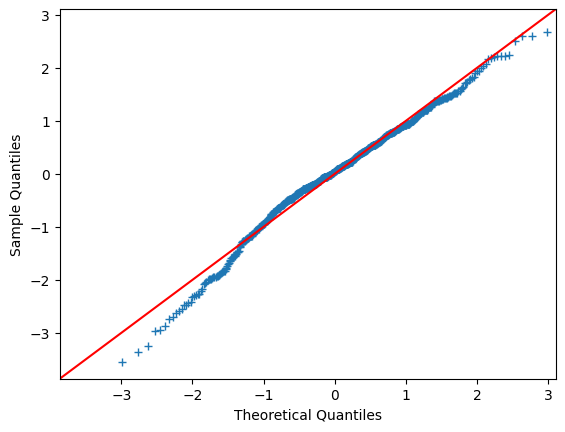

In [52]:
sm.graphics.qqplot(first_model.resid, fit=True, line='45', fmt='b', marker='+');

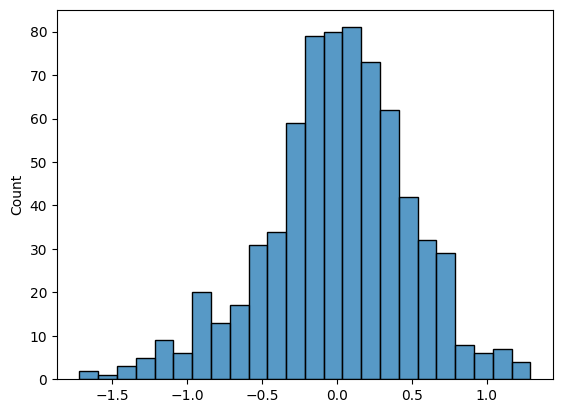

In [53]:
sns.histplot(first_model.resid);

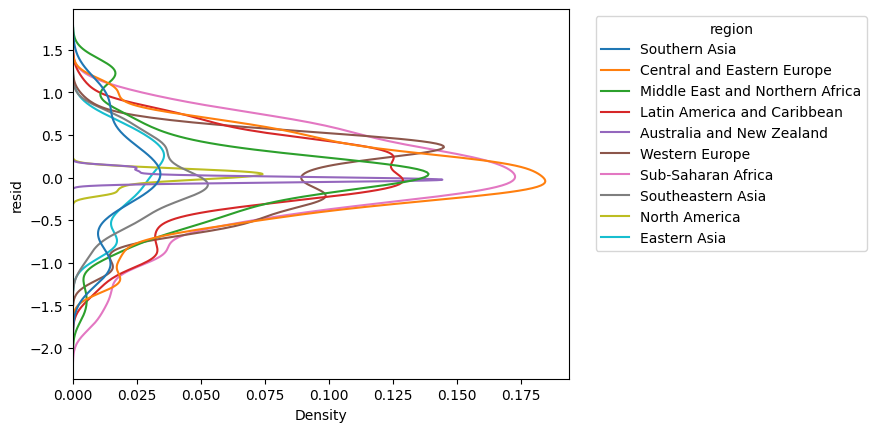

In [54]:
df_with_resid = df_na.copy()
df_with_resid['resid'] = first_model.resid
ax = sns.kdeplot(df_with_resid, y='resid', hue='region', bw_adjust=.75)
ax.get_legend().set_bbox_to_anchor((1.04, 1))

In [56]:
comparisons_between_regions = first_model.t_test_pairwise('region')
comparisons_between_regions.result_frame

coef   std err  \
Central and Eastern Europe-Australia and New Ze... -0.674305  0.179821   
Eastern Asia-Australia and New Zealand             -0.913330  0.189899   
Latin America and Caribbean-Australia and New Z... -0.061745  0.179681   
Middle East and Northern Africa-Australia and N... -0.776541  0.181414   
North America-Australia and New Zealand             0.048366  0.221657   
Southeastern Asia-Australia and New Zealand        -0.716196  0.184079   
Southern Asia-Australia and New Zealand            -0.699092  0.197341   
Sub-Saharan Africa-Australia and New Zealand       -0.776437  0.200344   
Western Europe-Australia and New Zealand           -0.232455  0.166421   
Eastern Asia-Central and Eastern Europe            -0.239026  0.104026   
Latin America and Caribbean-Central and Eastern...  0.612559  0.064791   
Middle East and Northern Africa-Central and Eas... -0.102236  0.071169   
North America-Central and Eastern Europe            0.722670  0.171646   
Southeastern Asia-Central and Eastern Europe       -0.041892  0.099702   
Southern Asia-Central and Eastern Europe           -0.024788  0.104628   
Sub-Saharan Africa-Central and Eastern Europe      -0.102132  0.089877   
Western Europe-Central and Eastern Europe           0.441849  0.082623   
Latin America and Caribbean-Eastern Asia            0.851585  0.107409   
Middle East and Northern Africa-Eastern Asia        0.136789  0.110660   
North America-Eastern Asia                          0.961696  0.183908   
Southeastern Asia-Eastern Asia                      0.197134  0.128564   
Southern Asia-Eastern Asia                          0.214238  0.138060   
Sub-Saharan Africa-Eastern Asia                     0.136893  0.137733   
Western Europe-Eastern Asia                         0.680875  0.106254   
Middle East and Northern Africa-Latin America a... -0.714796  0.076990   
North America-Latin America and Caribbean           0.110111  0.172871   
Southeastern Asia-Latin America and Caribbean      -0.654451  0.100062   
Southern Asia-Latin America and Caribbean          -0.637347  0.105922   
Sub-Saharan Africa-Latin America and Caribbean     -0.714692  0.090983   
Western Europe-Latin America and Caribbean         -0.170710  0.085378   
North America-Middle East and Northern Africa       0.824907  0.173733   
Southeastern Asia-Middle East and Northern Africa   0.060345  0.104166   
Southern Asia-Middle East and Northern Africa       0.077449  0.105947   
Sub-Saharan Africa-Middle East and Northern Africa  0.000104  0.091597   
Western Europe-Middle East and Northern Africa      0.544086  0.088719   
Southeastern Asia-North America                    -0.764562  0.179259   
Southern Asia-North America                        -0.747458  0.191079   
Sub-Saharan Africa-North America                   -0.824803  0.193012   
Western Europe-North America                       -0.280821  0.163890   
Southern Asia-Southeastern Asia                     0.017104  0.120432   
Sub-Saharan Africa-Southeastern Asia               -0.060241  0.113691   
Western Europe-Southeastern Asia                    0.483741  0.104638   
Sub-Saharan Africa-Southern Asia                   -0.077345  0.103689   
Western Europe-Southern Asia                        0.466637  0.121773   
Western Europe-Sub-Saharan Africa                   0.543981  0.123527   

                                                           t         P>|t|  \
Central and Eastern Europe-Australia and New Ze... -3.749856  1.919098e-04   
Eastern Asia-Australia and New Zealand             -4.809567  1.861617e-06   
Latin America and Caribbean-Australia and New Z... -0.343638  7.312238e-01   
Middle East and Northern Africa-Australia and N... -4.280487  2.131229e-05   
North America-Australia and New Zealand             0.218200  8.273384e-01   
Southeastern Asia-Australia and New Zealand        -3.890695  1.097262e-04   
Southern Asia-Australia and New Zealand            -3.542562  4.231857e-04   
Sub-Saharan Africa-Australi

In [57]:
comparisons_between_regions = first_model.t_test_pairwise('region', method='bonferroni')
comparisons_between_regions.result_frame

coef   std err  \
Central and Eastern Europe-Australia and New Ze... -0.674305  0.179821   
Eastern Asia-Australia and New Zealand             -0.913330  0.189899   
Latin America and Caribbean-Australia and New Z... -0.061745  0.179681   
Middle East and Northern Africa-Australia and N... -0.776541  0.181414   
North America-Australia and New Zealand             0.048366  0.221657   
Southeastern Asia-Australia and New Zealand        -0.716196  0.184079   
Southern Asia-Australia and New Zealand            -0.699092  0.197341   
Sub-Saharan Africa-Australia and New Zealand       -0.776437  0.200344   
Western Europe-Australia and New Zealand           -0.232455  0.166421   
Eastern Asia-Central and Eastern Europe            -0.239026  0.104026   
Latin America and Caribbean-Central and Eastern...  0.612559  0.064791   
Middle East and Northern Africa-Central and Eas... -0.102236  0.071169   
North America-Central and Eastern Europe            0.722670  0.171646   
Southeastern Asia-Central and Eastern Europe       -0.041892  0.099702   
Southern Asia-Central and Eastern Europe           -0.024788  0.104628   
Sub-Saharan Africa-Central and Eastern Europe      -0.102132  0.089877   
Western Europe-Central and Eastern Europe           0.441849  0.082623   
Latin America and Caribbean-Eastern Asia            0.851585  0.107409   
Middle East and Northern Africa-Eastern Asia        0.136789  0.110660   
North America-Eastern Asia                          0.961696  0.183908   
Southeastern Asia-Eastern Asia                      0.197134  0.128564   
Southern Asia-Eastern Asia                          0.214238  0.138060   
Sub-Saharan Africa-Eastern Asia                     0.136893  0.137733   
Western Europe-Eastern Asia                         0.680875  0.106254   
Middle East and Northern Africa-Latin America a... -0.714796  0.076990   
North America-Latin America and Caribbean           0.110111  0.172871   
Southeastern Asia-Latin America and Caribbean      -0.654451  0.100062   
Southern Asia-Latin America and Caribbean          -0.637347  0.105922   
Sub-Saharan Africa-Latin America and Caribbean     -0.714692  0.090983   
Western Europe-Latin America and Caribbean         -0.170710  0.085378   
North America-Middle East and Northern Africa       0.824907  0.173733   
Southeastern Asia-Middle East and Northern Africa   0.060345  0.104166   
Southern Asia-Middle East and Northern Africa       0.077449  0.105947   
Sub-Saharan Africa-Middle East and Northern Africa  0.000104  0.091597   
Western Europe-Middle East and Northern Africa      0.544086  0.088719   
Southeastern Asia-North America                    -0.764562  0.179259   
Southern Asia-North America                        -0.747458  0.191079   
Sub-Saharan Africa-North America                   -0.824803  0.193012   
Western Europe-North America                       -0.280821  0.163890   
Southern Asia-Southeastern Asia                     0.017104  0.120432   
Sub-Saharan Africa-Southeastern Asia               -0.060241  0.113691   
Western Europe-Southeastern Asia                    0.483741  0.104638   
Sub-Saharan Africa-Southern Asia                   -0.077345  0.103689   
Western Europe-Southern Asia                        0.466637  0.121773   
Western Europe-Sub-Saharan Africa                   0.543981  0.123527   

                                                           t         P>|t|  \
Central and Eastern Europe-Australia and New Ze... -3.749856  1.919098e-04   
Eastern Asia-Australia and New Zealand             -4.809567  1.861617e-06   
Latin America and Caribbean-Australia and New Z... -0.343638  7.312238e-01   
Middle East and Northern Africa-Australia and N... -4.280487  2.131229e-05   
North America-Australia and New Zealand             0.218200  8.273384e-01   
Southeastern Asia-Australia and New Zealand        -3.890695  1.097262e-04   
Southern Asia-Australia and New Zealand            -3.542562  4.231857e-04   
Sub-Saharan Africa-Australi

In [80]:
model_with_interactions = smf.ols('happiness ~ region + gdp + social * generosity + social * corruption + social * health + generosity * corruption + generosity * health + corruption * health', df_na).fit()
model_with_interactions.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     139.5
Date:                Sun, 02 Nov 2025   Prob (F-statistic):          2.41e-225
Time:                        19:40:33   Log-Likelihood:                -505.74
No. Observations:                 703   AIC:                             1053.
Df Residuals:                     682   BIC:                             1149.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     3.9048      0.312     12.529      0.000       3.293       4.517
region[T.Central and Eastern Europe]         -0.5559      0.200     -2.783      0.006      -0.948      -0.164
region[T.Eastern Asia]                       -0.9199      0.209     -4.394      0.000      -1.331      -0.509
region[T.Latin America and Caribbean]         0.0845      0.200      0.422      0.673      -0.309       0.478
region[T.Middle East and Northern Africa]    -0.7850      0.201     -3.896      0.000      -1.181      -0.389
region[T.North America]                       0.0935      0.234      0.399      0.690      -0.366       0.553
region[T.Southeastern Asia]                  -0.6446      0.207     -3.117      0.002      -1.051      -0.239
region[T.Southern Asia]                      -0.7077      0.217     -3.256      0.001      -1.135      -0.281
region[T.Sub-Saharan Africa]                 -0.6472      0.216     -2.990      0.003      -1.072      -0.222
region[T.Western Europe]                     -0.2189      0.183     -1.196      0.232      -0.578       0.140
gdp                                           1.1589      0.095     12.139      0.000       0.971       1.346
social                                        0.1549      0.199      0.779      0.436      -0.235       0.545
generosity                                   -0.3060      0.737     -0.415      0.678      -1.754       1.142
social:generosity                             1.0056      0.457      2.203      0.028       0.109       1.902
corruption                                   -2.7547      0.940     -2.931      0.003      -4.600      -0.910
social:corruption                             1.7269      0.568      3.040      0.002       0.611       2.842
health                                        1.0332      0.340      3.038      0.002       0.365       1.701
social:health                                -0.2834      0.250     -1.133      0.258      -0.775       0.208
generosity:corruption                        -3.8850      1.888     -2.058      0.040      -7.592      -0.178
generosity:health                             0.4313      0.986      0.437      0.662      -1.504       2.367
corruption:health                             3.8839      0.975      3.983      0.000       1.969       5.798
==============================================================================
Omnibus:                       11.877   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.994
Skew:                          -0.312   Prob(JB):                      0.00249
Kurtosis:                       3.138   Cond. No.                         207.
================================================

## PCA
Build a DF with the principal components and quantitative variables.

In [10]:
quantitative_variables = df.describe().columns.tolist()

In [11]:
from sklearn.decomposition import PCA

truly_quantitative_variables = [col for col in quantitative_variables if col != 'year'] # year is more an ordinal variable than a quantitative one
projected_data = PCA().fit_transform(df[truly_quantitative_variables])

components = [f'component {i+1}' for i in range(projected_data.shape[1])]
projected_data = pd.DataFrame(projected_data, index=df.index, columns=components)
projected_data = pd.concat((projected_data, df[quantitative_variables]), axis=1)
projected_data

component 1  component 2  component 3  component 4  component 5  \
0      -2.057677    -0.285306    -0.107572     0.175048     0.023389   
1      -0.456278    -0.085807     0.170288    -0.121927     0.160411   
2       0.182498     0.119771    -0.037394    -0.105631    -0.052906   
3       1.170075     0.123462    -0.181883    -0.186753     0.016596   
4      -1.074671    -0.013981     0.244917    -0.161341     0.139616   
..           ...          ...          ...          ...          ...   
715    -0.778031    -0.687464     0.306326    -0.118631     0.035567   
716    -0.328624    -0.375090    -0.012361    -0.147621     0.196512   
717    -2.255091    -0.446731     0.013417    -0.075900     0.075611   
718    -1.452043    -0.261257     0.011788     0.069181    -0.020735   
719    -1.936904    -0.268468    -0.017655    -0.035801     0.045910   

     component 6  year  happiness      gdp   health  generosity   social  \
0      -0.035472  2015      3.575  0.31982  0.30335     0.36510  0.30285   
1       0.001297  2015      4.959  0.87867  0.81325     0.14272  0.80434   
2       0.106075  2015      5.605  0.93929  0.61766     0.07822  1.07772   
3      -0.000975  2015      6.574  1.05351  0.78723     0.11451  1.24823   
4       0.021190  2015      4.350  0.76821  0.72990     0.07855  0.77711   
..           ...   ...        ...      ...      ...         ...      ...   
715     0.000753  2019      4.707  0.96000  0.80500     0.06400  0.15400   
716     0.012496  2019      5.175  0.74100  0.85100     0.14700  0.54300   
717     0.070733  2019      3.380  0.28700  0.46300     0.10800  0.14300   
718    -0.014850  2019      4.107  0.57800  0.42600     0.24700  0.43100   
719     0.054270  2019      3.663  0.36600  0.43300     0.15100  0.36100   

     corruption  
0       0.09719  
1       0.06413  
2       0.17383  
3       0.08484  
4       0.03900  
..          ...  
715     0.04700  
716     0.07300  
717     0.07700  
718     0.08700  
719     0.08900  

[720 rows x 13 columns]

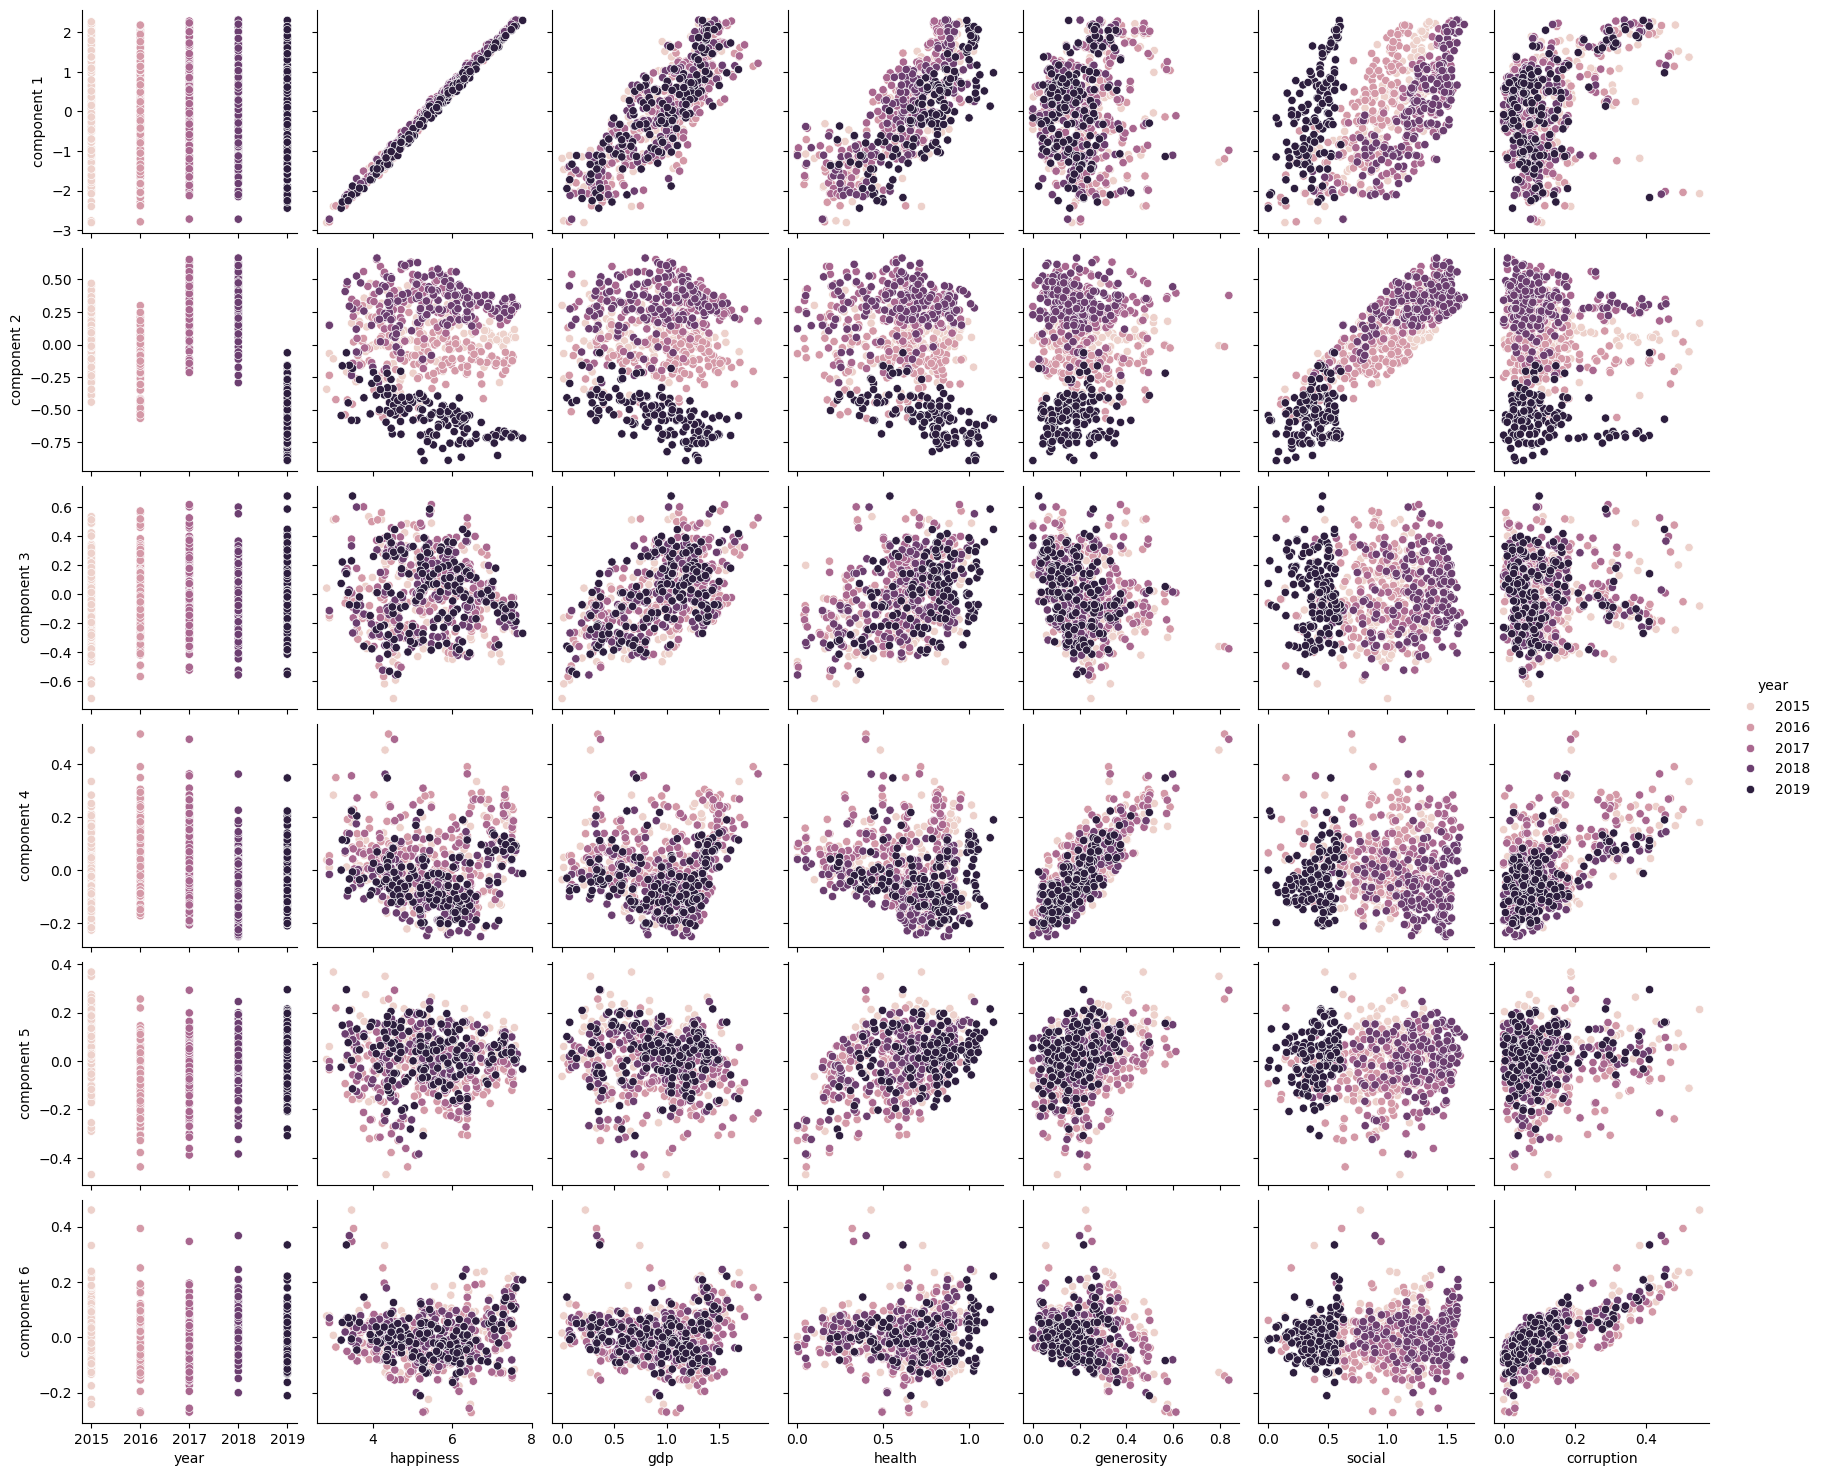

In [12]:
sns.pairplot(projected_data, hue='year', x_vars=quantitative_variables, y_vars=components);

## Scree plot

Draw a scree plot to select a number of components.

Run the PCA with the maximum likelihood estimator technique to automatically select components.

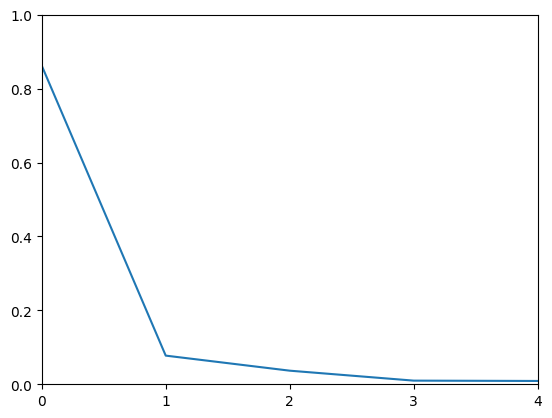

In [13]:
pca = PCA(n_components='mle').fit(df[truly_quantitative_variables])
ax = sns.lineplot(pca.explained_variance_ratio_)
ax.set_ylim([0, 1])
ax.set_xlim([0, pca.n_components_ - 1])
ax.set_xticks(range(pca.n_components_));

# UMAP

*umap-learn* is now listed in the *requirements.txt* file. Just in case:

In [ ]:
!"{sys.executable}" -m pip install --upgrade umap-learn

Carry out a 2D UMAP transform with whatever parameter values (*e.g.* 10 neighbors and unit minimum distance).

Plot the UMAP-projected points colored by region and score.

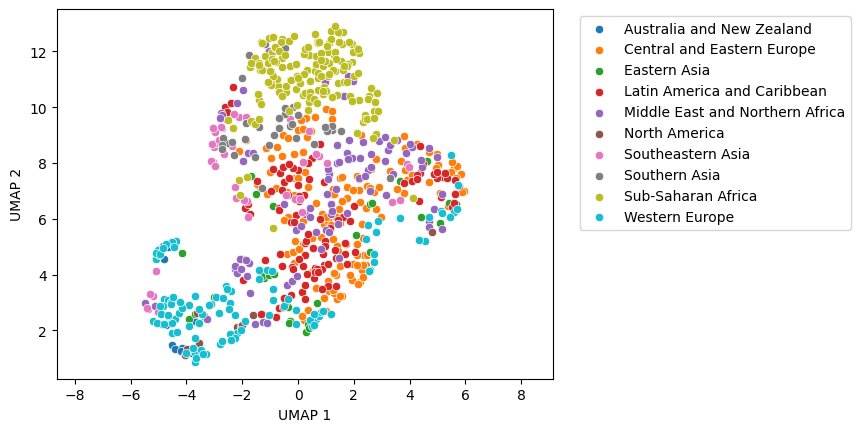

In [15]:
import umap

from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(df[truly_quantitative_variables])

umap_projected_data = umap.UMAP(
    n_neighbors=25,
    min_dist=0.5,
    random_state=354842,
    n_jobs=1,
).fit_transform(scaled_data)

for region in np.unique(df['region']):
    region_data = umap_projected_data[df['region'] == region, :]
    ax = sns.scatterplot(
        x=region_data[:, 0],
        y=region_data[:, 1],
        label=region,
    )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_aspect('equal', 'datalim')
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

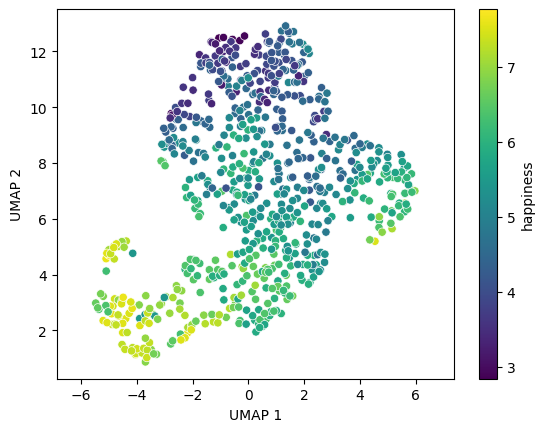

In [16]:
ax = sns.scatterplot(
    x=umap_projected_data[:, 0],
    y=umap_projected_data[:, 1],
    c=df['happiness'],
)
plt.colorbar(ax.get_children()[0], label='happiness')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_aspect('equal', 'datalim');

For illustration purpose, we may seek for the set of UMAP parameters that maximizes the separation between two groups.
This can be done by maximizing the Silhouette score:

In [17]:
from sklearn.metrics import silhouette_score

Let us try to highlight the Occident (*USA/Canada* and *Europe*) *vs* rest of the world.

In [18]:
# indicator variables

# 1. Europe vs rest of the world
group1 = (df['region'] == 'Central and Eastern Europe') | (df['region'] == 'Western Europe')
group2 = ~group1

# 2. Central/Eastern Europe vs Western Europe
#group1 = (df['region'] == 'Central and Eastern Europe')
#group2 = (df['region'] == 'Western Europe')

def objective_function(projected_data):
    x = projected_data[group1, :]
    y = projected_data[group2, :]
    score = silhouette_score(np.vstack((x, y)), np.repeat([0, 1], [x.shape[0], y.shape[0]]))
    return score

Find the combination of parameter values that maximizes the above score, using a grid search with neighbor counts 2, 3, 5, 10, 20, 30, 50, 100 and minimum distances 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0.

In [19]:
param_grid = {'n_neighbors': [2, 3, 5, 10, 20, 30, 50, 100], 'min_dist': np.arange(.1, 1.1, .1)}
param_grid

{'n_neighbors': [2, 3, 5, 10, 20, 30, 50, 100],
 'min_dist': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}

Run the exhaustive grid search (takes time):

In [20]:
grid_n_neighbors = []
grid_min_dist = []
grid_scores = []

for n_neighbors in param_grid['n_neighbors']:
    for min_dist in param_grid['min_dist']:
        
        embedding = umap.UMAP(
            n_neighbors=n_neighbors,
            min_dist=min_dist,
        ).fit(scaled_data)
        projected_data = embedding.transform(scaled_data)
        score = objective_function(projected_data)
        
        grid_n_neighbors.append(n_neighbors)
        grid_min_dist.append(min_dist)
        grid_scores.append(score)

grid_results = pd.DataFrame({'n_neighbors': grid_n_neighbors, 'min_dist': grid_min_dist, 'silhouette': grid_scores})
grid_results

n_neighbors  min_dist  silhouette
0             2       0.1    0.053424
1             2       0.2    0.025524
2             2       0.3    0.022244
3             2       0.4    0.027860
4             2       0.5    0.022597
..          ...       ...         ...
75          100       0.6    0.102839
76          100       0.7    0.097343
77          100       0.8    0.100079
78          100       0.9    0.096012
79          100       1.0    0.097062

[80 rows x 3 columns]

Find out which combination works best and plot the projected data again:

In [21]:
best = np.argmax(grid_scores)
best_n_neighbors = grid_n_neighbors[best]
best_min_dist = grid_min_dist[best]

print('n_neighbors:', best_n_neighbors, ', min_dist:', best_min_dist, ', score:', grid_scores[best])

n_neighbors: 5 , min_dist: 0.2 , score: 0.12769176065921783


In [22]:
new_projected_data = umap.UMAP(
    n_neighbors=best_n_neighbors,
    min_dist=best_min_dist,
).fit_transform(scaled_data)

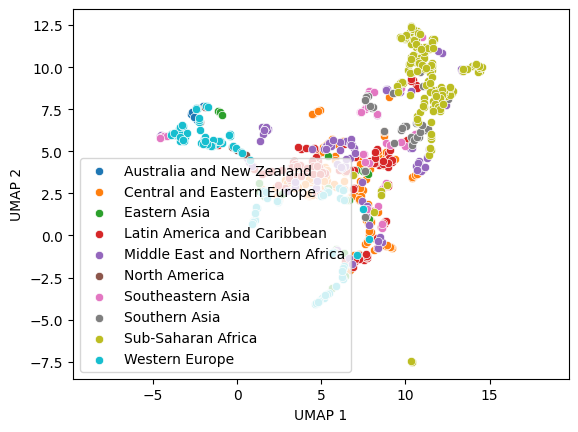

In [23]:
for region in np.unique(df['region']):
    region_data = new_projected_data[df['region'] == region, :]
    ax = sns.scatterplot(
        x=region_data[:, 0],
        y=region_data[:, 1],
        label=region,
    )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_aspect('equal', 'datalim');

# Agglomerative clustering

In [24]:
from sklearn.cluster import AgglomerativeClustering

agglomerated_clusters = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(scaled_data)

In [25]:
from scipy.cluster.hierarchy import dendrogram

# copy-pasted from https://scikit-learn.org/1.7/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    return dendrogram(linkage_matrix, **kwargs)

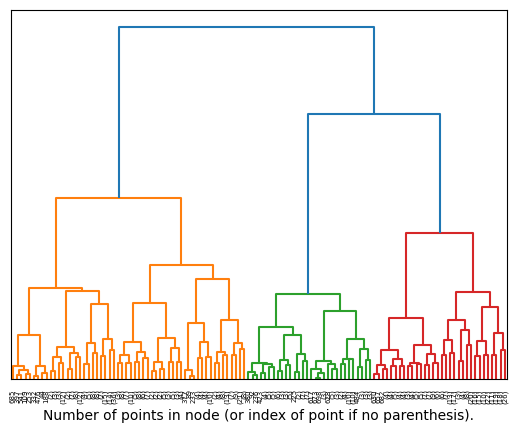

In [26]:
plot_dendrogram(agglomerated_clusters, truncate_mode="level", p=6)
ax = plt.gca()
ax.set_xlabel("Number of points in node (or index of point if no parenthesis).")
ax.set_yticks([]);

Now we can cut at a higher level to adjust the number of clusters.

# More basic clustering

## k-means

For visualization purposes, we encode the cluster association as the color of points in 2D. We can use the first two principal components or the UMAP components.

In [27]:
from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_clusters=3, n_init=10).fit(scaled_data)

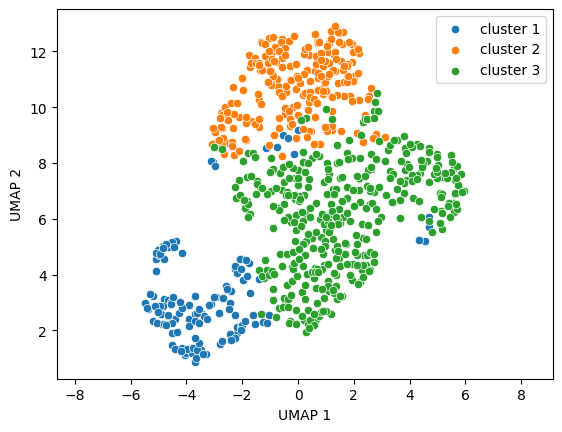

In [28]:
for cluster in range(k_means.n_clusters):
    cluster_data = umap_projected_data[k_means.labels_ == cluster, :]
    ax = sns.scatterplot(
        x=cluster_data[:, 0],
        y=cluster_data[:, 1],
        label=f'cluster {cluster+1}',
    )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_aspect('equal', 'datalim');